In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

%matplotlib inline

In [97]:
data = pd.read_csv('dataset_train.csv', index_col='Index')

In [21]:
data.head(5)

Hogwarts House First Name  Last Name    Birthday Best Hand  Arithmancy  \
Index                                                                          
0          Ravenclaw     Tamara        Hsu  2000-03-30      Left     58384.0   
1          Slytherin      Erich    Paredes  1999-10-14     Right     67239.0   
2          Ravenclaw   Stephany      Braun  1999-11-03      Left     23702.0   
3         Gryffindor      Vesta  Mcmichael  2000-08-19      Left     32667.0   
4         Gryffindor     Gaston      Gibbs  1998-09-27      Left     60158.0   

        Astronomy  Herbology  Defense Against the Dark Arts  Divination  \
Index                                                                     
0     -487.886086   5.727180                       4.878861       4.722   
1     -552.060507  -5.987446                       5.520605      -5.612   
2     -366.076117   7.725017                       3.660761       6.140   
3      697.742809  -6.497214                      -6.977428       4.026   
4      436.775204  -7.820623                            NaN       2.236   

       Muggle Studies  Ancient Runes  History of Magic  Transfiguration  \
Index                                                                     
0          272.035831     532.484226          5.231058      1039.788281   
1         -487.340557     367.760303          4.107170      1058.944592   
2          664.893521     602.585284          3.555579      1088.088348   
3         -537.001128     523.982133         -4.809637       920.391449   
4         -444.262537     599.324514         -3.444377       937.434724   

        Potions  Care of Magical Creatures     Charms  Flying  
Index                                                          
0      3.790369                   0.715939 -232.79405  -26.89  
1      7.248742                   0.091674 -252.18425 -113.45  
2      8.728531                  -0.515327 -227.34265   30.42  
3      0.821911                  -0.014040 -256.84675  200.64  
4      4.311066                  -0.264070 -256.38730  157.98

In [22]:
data.describe()

Arithmancy    Astronomy    Herbology  Defense Against the Dark Arts  \
count    1566.000000  1568.000000  1567.000000                    1569.000000   
mean    49634.570243    39.797131     1.141020                      -0.387863   
std     16679.806036   520.298268     5.219682                       5.212794   
min    -24370.000000  -966.740546   -10.295663                     -10.162119   
25%     38511.500000  -489.551387    -4.308182                      -5.259095   
50%     49013.500000   260.289446     3.469012                      -2.589342   
75%     60811.250000   524.771949     5.419183                       4.904680   
max    104956.000000  1016.211940    11.612895                       9.667405   

        Divination  Muggle Studies  Ancient Runes  History of Magic  \
count  1561.000000     1565.000000    1565.000000       1557.000000   
mean      3.153910     -224.589915     495.747970          2.963095   
std       4.155301      486.344840     106.285165          4.425775   
min      -8.727000    -1086.496835     283.869609         -8.858993   
25%       3.099000     -577.580096     397.511047          2.218653   
50%       4.624000     -419.164294     463.918305          4.378176   
75%       5.667000      254.994857     597.492230          5.825242   
max      10.032000     1092.388611     745.396220         11.889713   

       Transfiguration      Potions  Care of Magical Creatures       Charms  \
count      1566.000000  1570.000000                1560.000000  1600.000000   
mean       1030.096946     5.950373                  -0.053427  -243.374409   
std          44.125116     3.147854                   0.971457     8.783640   
min         906.627320    -4.697484                  -3.313676  -261.048920   
25%        1026.209993     3.646785                  -0.671606  -250.652600   
50%        1045.506996     5.874837                  -0.044811  -244.867765   
75%        1058.436410     8.248173                   0.589919  -232.552305   
max        1098.958201    13.536762                   3.056546  -225.428140   

            Flying  
count  1600.000000  
mean     21.958012  
std      97.631602  
min    -181.470000  
25%     -41.870000  
50%      -2.515000  
75%      50.560000  
max     279.070000

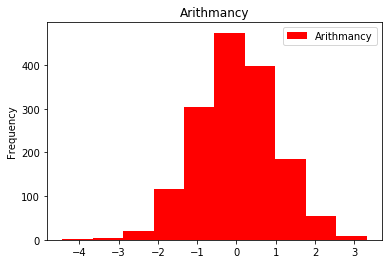

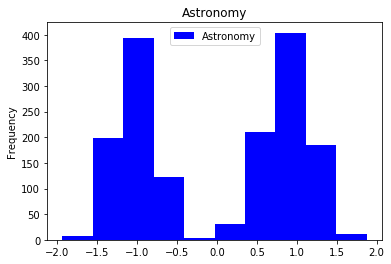

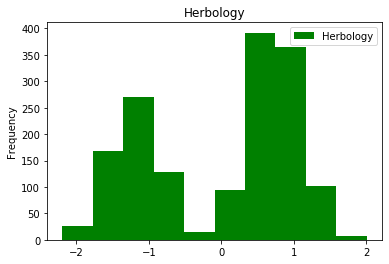

In [78]:
data.plot(y='Arithmancy', kind='hist', 
           color='red',  title='Arithmancy')
data.plot(y='Astronomy', kind='hist', 
           color='blue',  title='Astronomy')
data.plot(y='Herbology', kind='hist', 
           color='g',  title='Herbology')
plt.show()

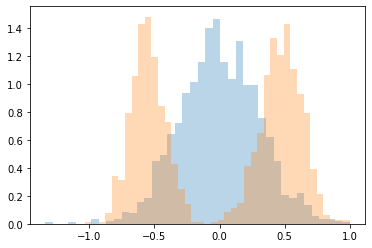

In [76]:
def normalazer(data):
    normal = []
    for i in data:
        normal.append(i / max(data))
    return normal

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)
x1 = np.array(normalazer(data['Arithmancy']))
x2 = np.array(normalazer(data['Astronomy']))
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.show()

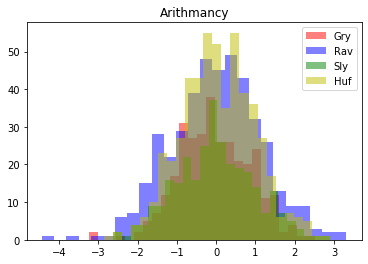

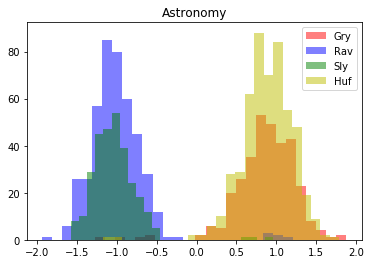

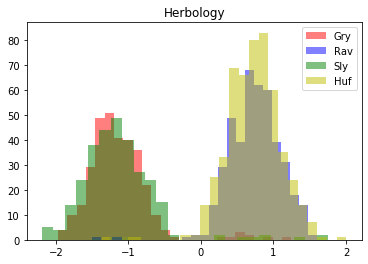

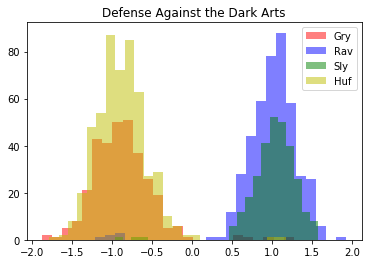

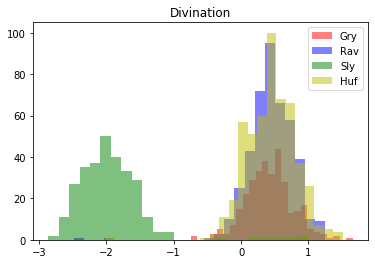

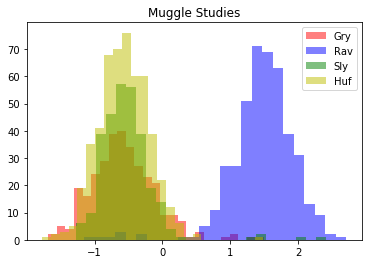

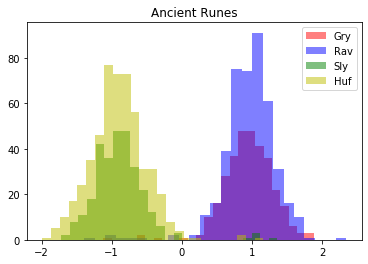

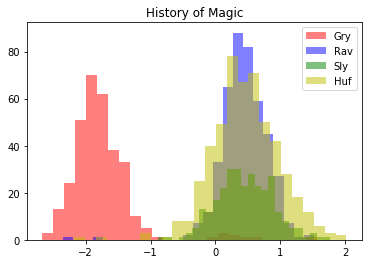

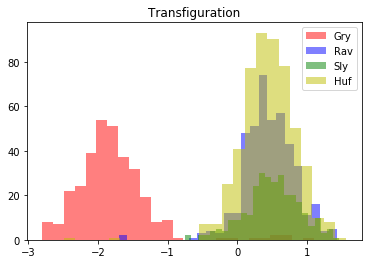

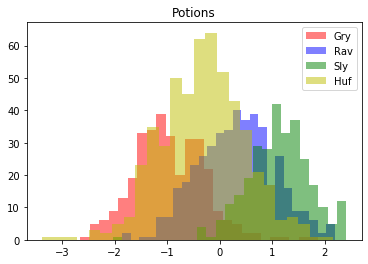

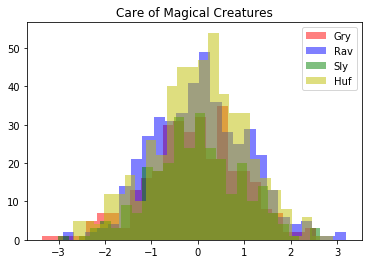

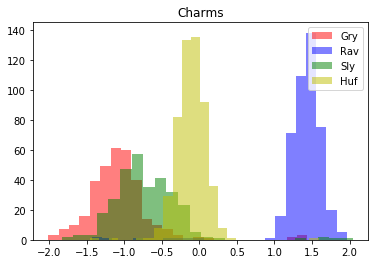

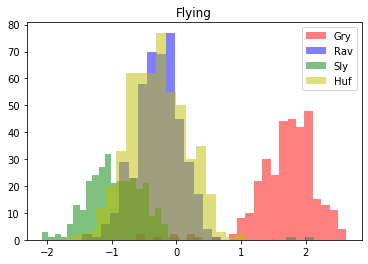

In [73]:
def numeric_features(dataset):
    numeric_col = []
    for col_name in dataset.columns:
        try:
            float(dataset[col_name][0])
            numeric_col.append(col_name)
        except ValueError:
            continue
    return numeric_col

def preprocess(dataset):
    cols = numeric_features(dataset)
    for col in cols:
        dataset[col] = (dataset[col] - dataset[col].mean()) / dataset[col].std()
    return dataset[cols]

def get_grades(dataset, prep_dataset, house, topic):
    df = prep_dataset[dataset["Hogwarts House"] == house][topic]
    df.dropna(inplace=True)
    return df

def plot_hist(dataset, prep_dataset):
    kwargs = dict(bins=25, alpha=0.5)
    for col in prep_dataset.columns:
        plt.figure()
        plt.hist(get_grades(dataset, prep_dataset, "Gryffindor", col), label = 'Gry', color = 'r', **kwargs)
        plt.hist(get_grades(dataset, prep_dataset, "Ravenclaw", col), label = 'Rav', color = 'b', **kwargs)
        plt.hist(get_grades(dataset, prep_dataset, "Slytherin", col), label = 'Sly', color = 'g', **kwargs)
        plt.hist(get_grades(dataset, prep_dataset, "Hufflepuff", col), label = 'Huf', color = 'y', **kwargs)
        plt.legend(loc = 'upper right')
        plt.title(col)
        plt.show()

prep_dataset = preprocess(data)
plot_hist(data, prep_dataset)

### Scatter plot

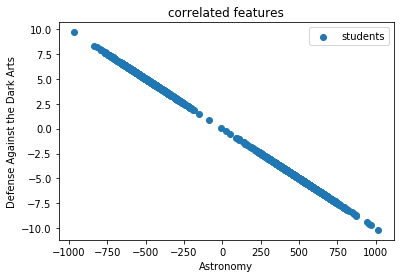

In [106]:
def preprocess(dataset):
    cols = ["Astronomy", "Defense Against the Dark Arts"]
    dataset = dataset[cols]
    dataset = dataset.dropna()
    return dataset

def scatter_plot(prep_dataset):
    plt.figure()
    plt.scatter(prep_dataset['Astronomy'], prep_dataset['Defense Against the Dark Arts'], label = 'students')
    plt.legend()
    plt.title("correlated features")
    plt.xlabel("Astronomy")
    plt.ylabel("Defense Against the Dark Arts")
    plt.show()
    
prep_dataset = preprocess(data)
scatter_plot(prep_dataset)

In [104]:
df = data.groupby(['Hogwarts House']).mean()
df.head()

Arithmancy   Astronomy  Herbology  \
Hogwarts House                                        
Gryffindor      49121.996855  493.336646  -4.783906   
Hufflepuff      50249.040230  497.708002   4.919408   
Ravenclaw       49446.345708 -480.043083   5.021857   
Slytherin       49374.806780 -496.333927  -4.775624   

                Defense Against the Dark Arts  Divination  Muggle Studies  \
Hogwarts House                                                              
Gryffindor                          -4.948000    4.901349     -501.483149   
Hufflepuff                          -4.981666    5.021665     -498.350774   
Ravenclaw                            4.818088    4.987894      489.111967   
Slytherin                            4.964016   -4.814491     -478.731883   

                Ancient Runes  History of Magic  Transfiguration   Potions  \
Hogwarts House                                                               
Gryffindor         596.934487         -4.814947       951.134696  2.938132   
Hufflepuff         400.147454          5.010295      1049.562165  4.960686   
Ravenclaw          597.749968          4.915960      1050.334282  6.972413   
Slytherin          401.813874          4.967681      1051.898698  9.470743   

                Care of Magical Creatures      Charms      Flying  
Hogwarts House                                                     
Gryffindor                      -0.139186 -252.731046  189.024526  
Hufflepuff                      -0.028449 -244.347364   -7.085690  
Ravenclaw                        0.003899 -231.080576   -3.979797  
Slytherin                       -0.087348 -249.593194  -70.321661

<Figure size 800x640 with 0 Axes>

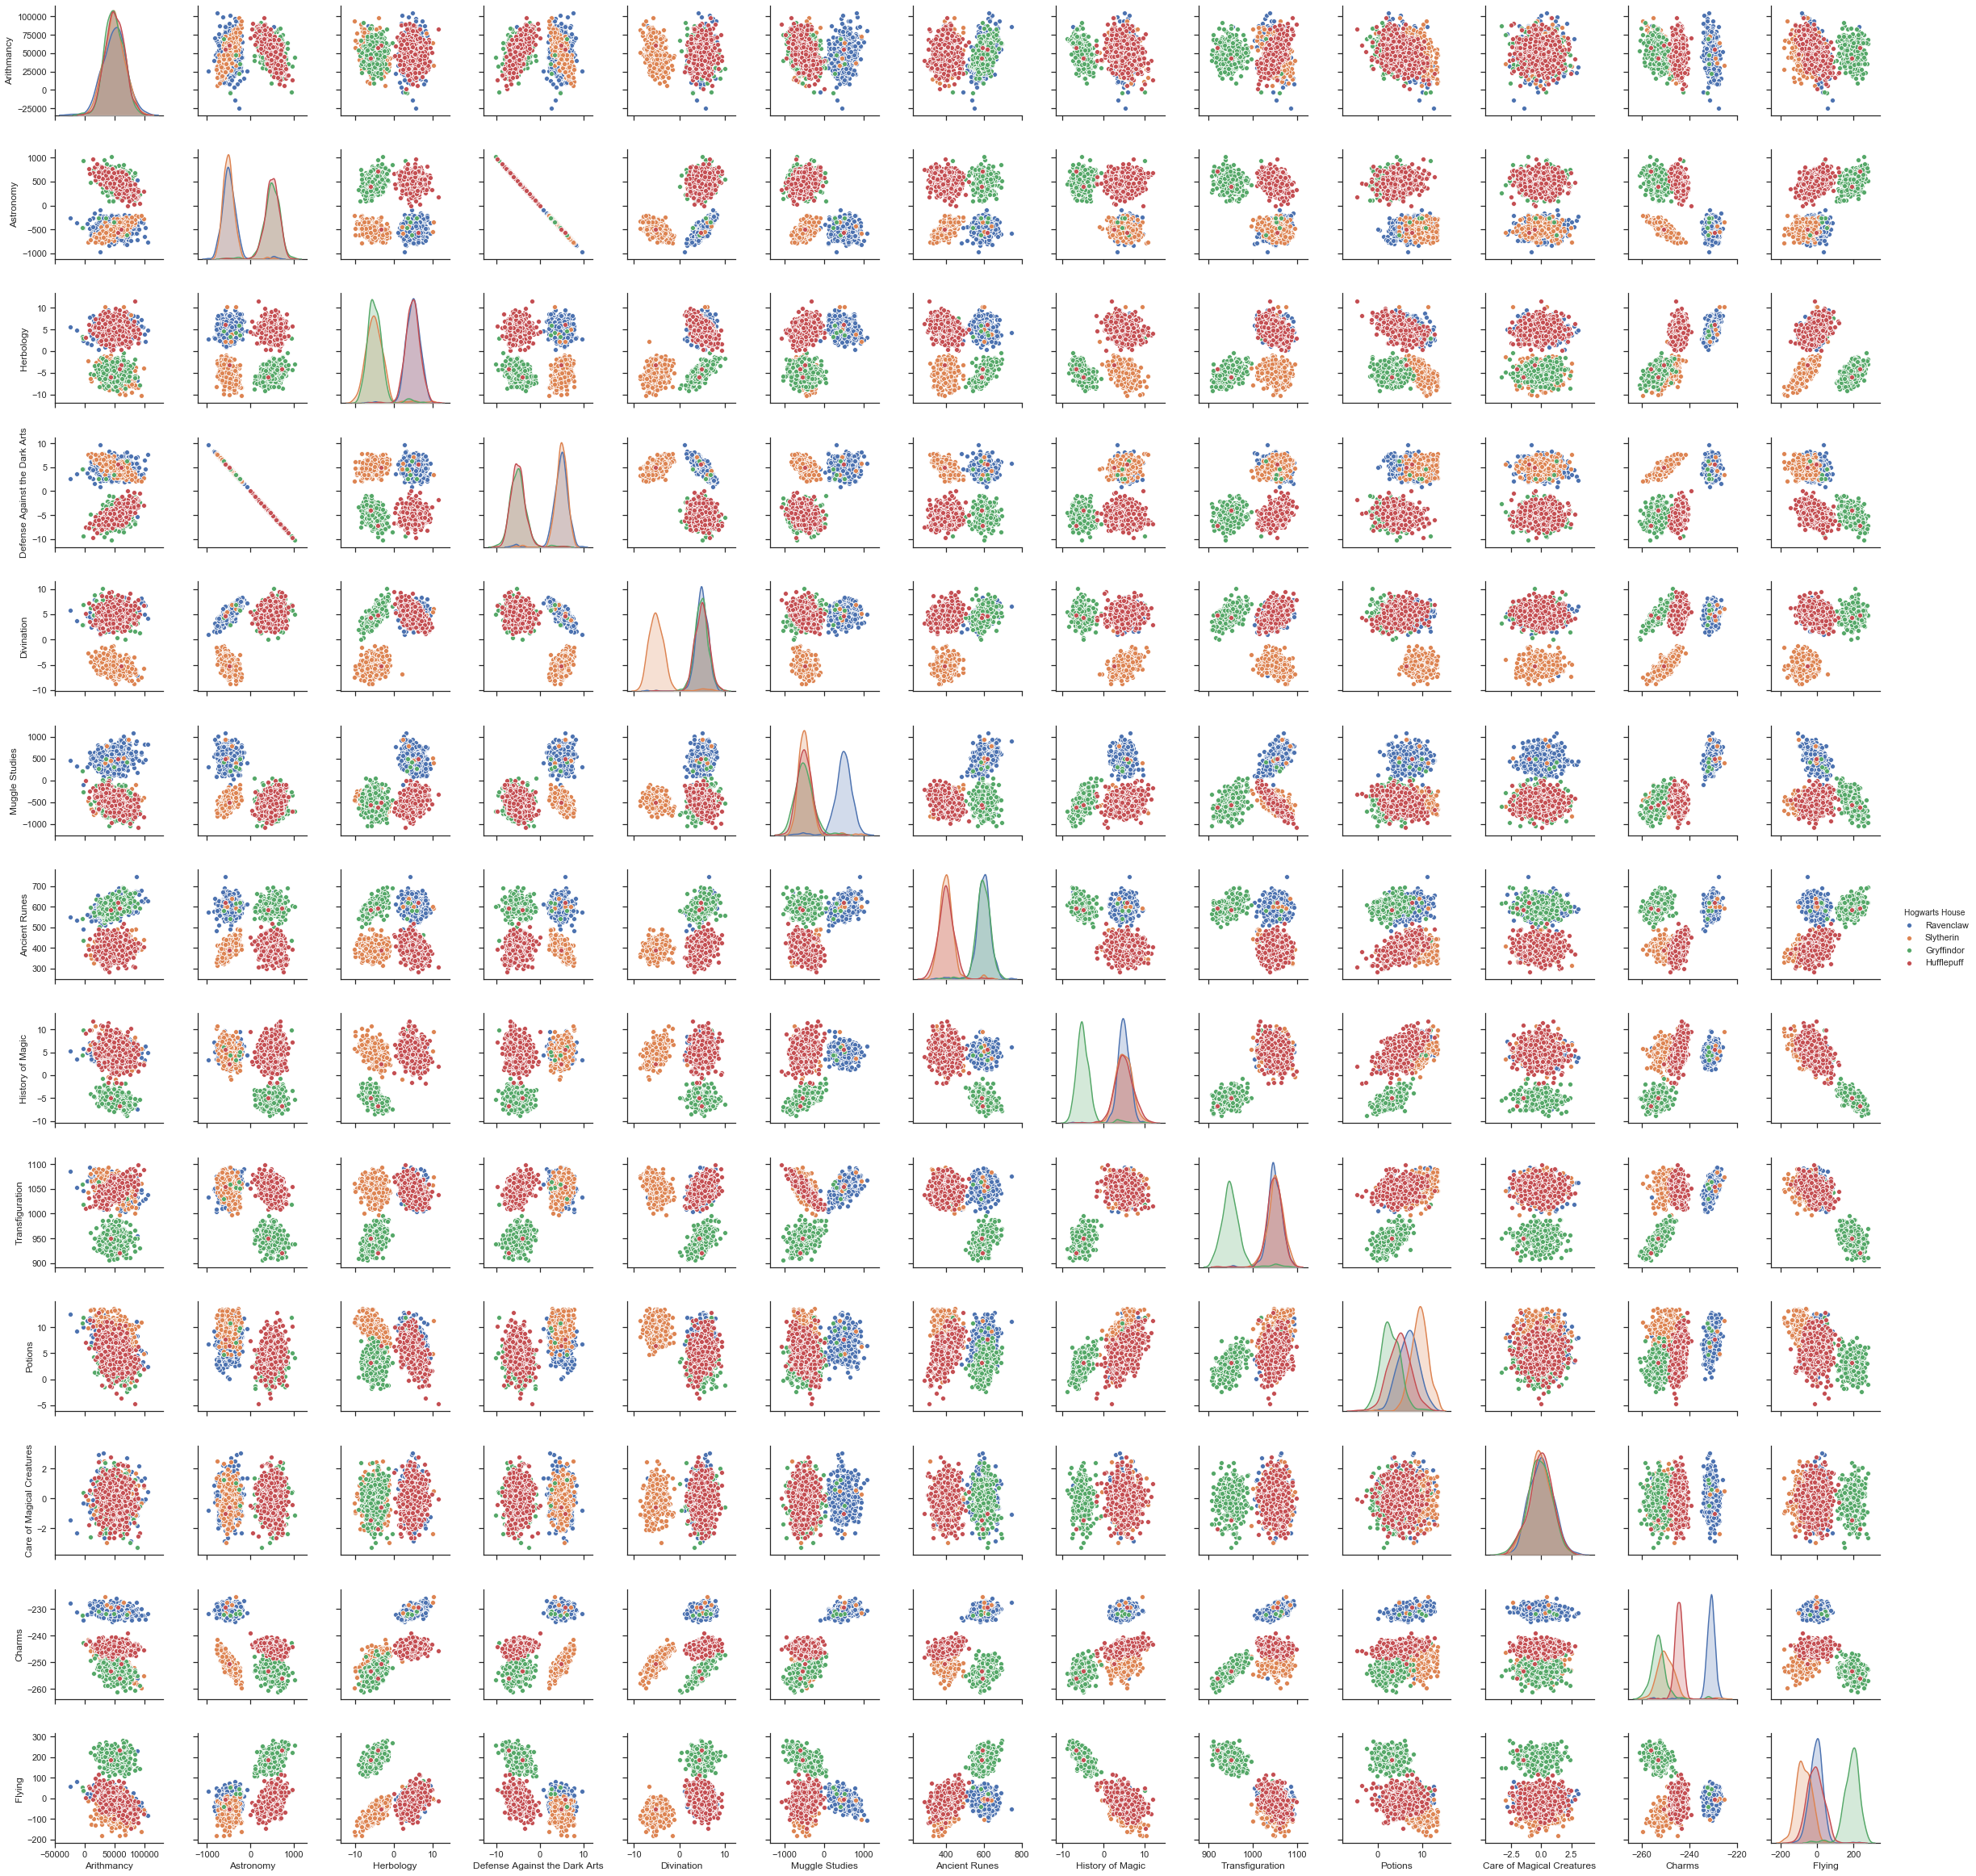

In [144]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(data, hue="Hogwarts House")
plt.show()

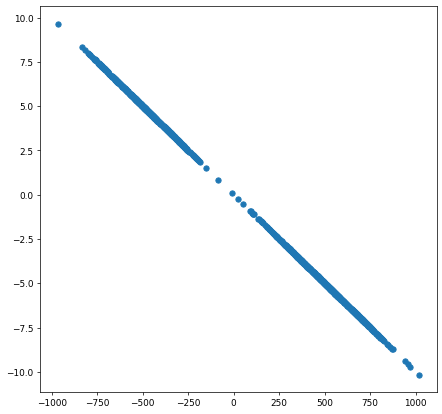

In [139]:
plt.figure(figsize=(8,8), dpi= 64)
plt.scatter(prep_dataset['Astronomy'], prep_dataset['Defense Against the Dark Arts'], label = 'students')
plt.show()

### Pair plot

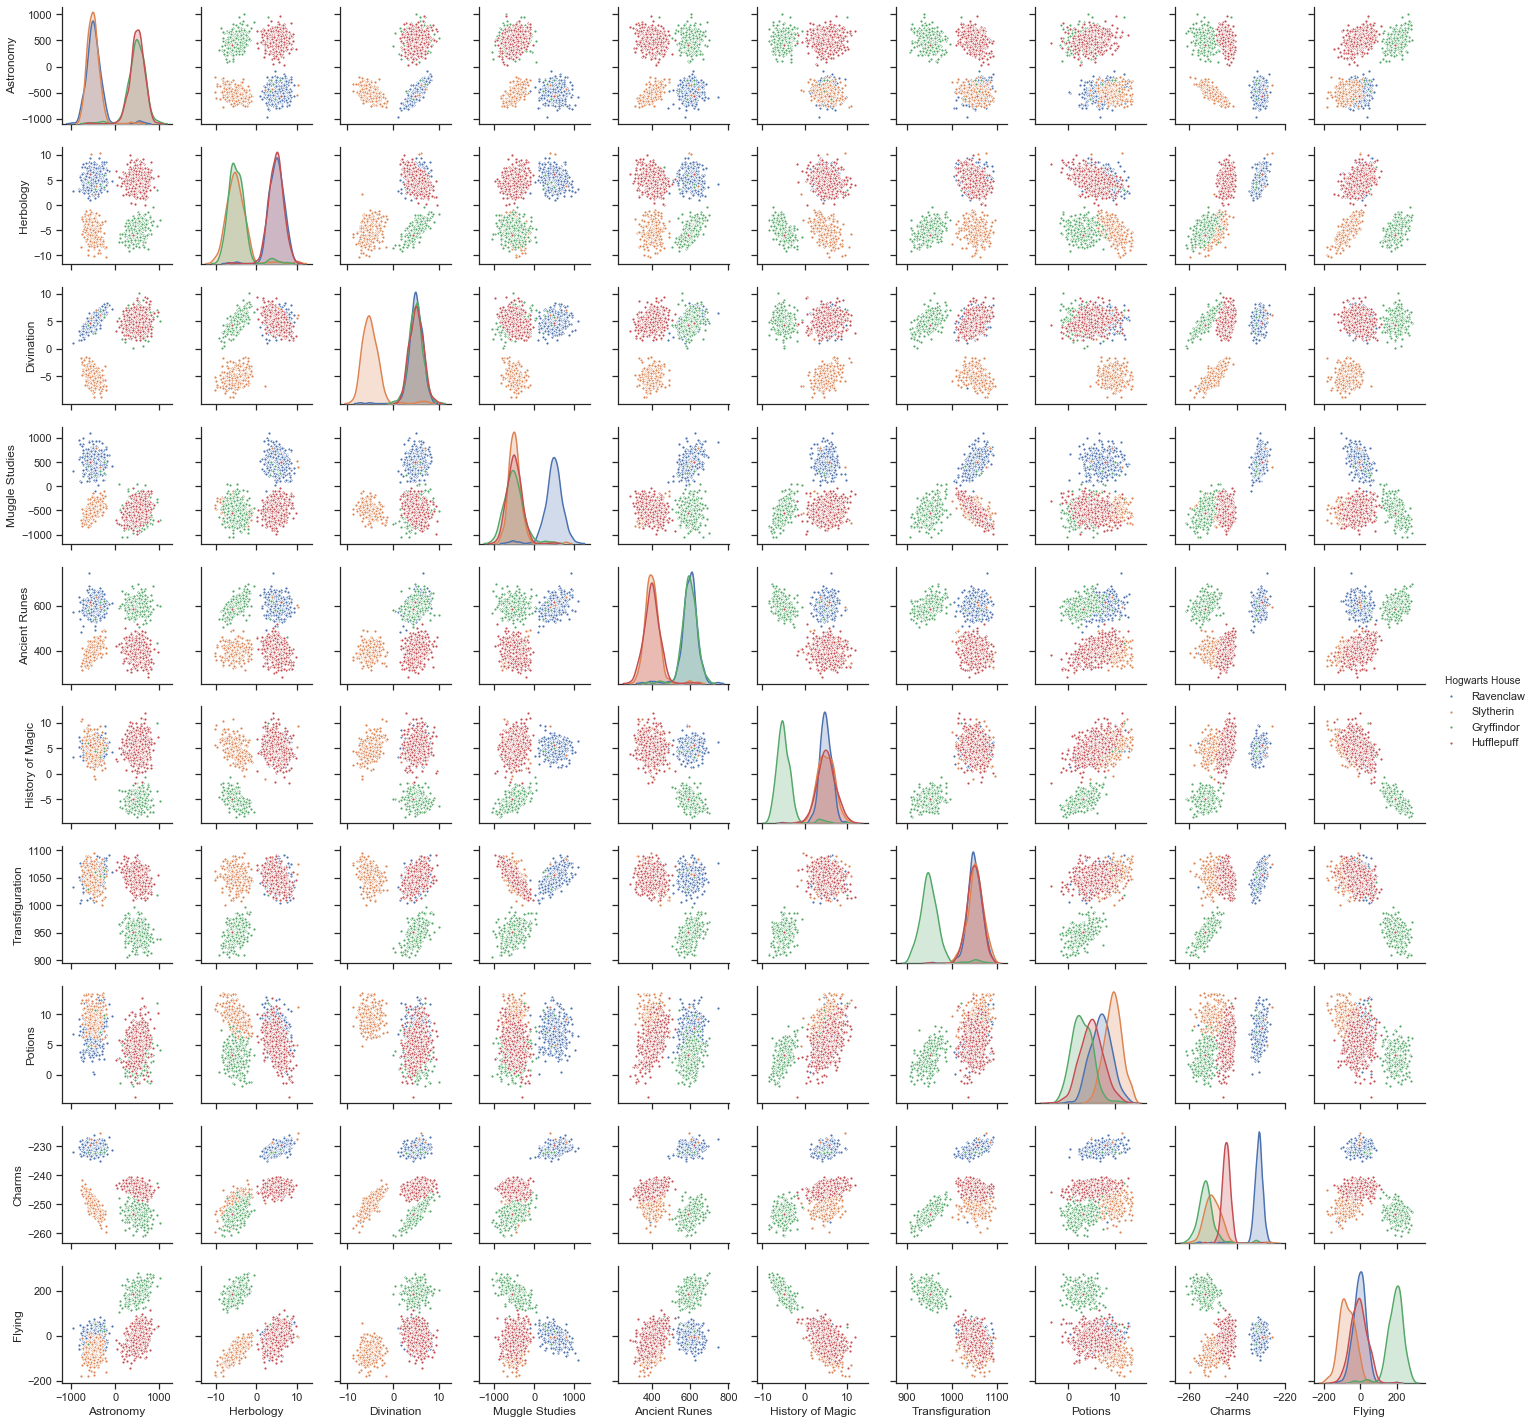

In [143]:
sns.set(style="ticks", color_codes=True)

def preprocess(dataset):
    cols = numeric_features(dataset)
    cols.remove("Defense Against the Dark Arts") # same as Astronomy
    cols.remove("Arithmancy") # homogenous repartition between houses
    cols.remove("Care of Magical Creatures") # homogenous repartition between houses
    cols = ["Hogwarts House"] + cols
    dataset = dataset[cols]
    dataset = dataset.dropna()
    return dataset

def scatter_plot(prep_dataset):
    sns.pairplot(prep_dataset, hue="Hogwarts House", markers = ".", size=2)
    plt.show()

prep_dataset = preprocess(data)
scatter_plot(prep_dataset)